In [1]:
import pandas as pd
df = pd.read_csv('Online retail.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.shape

(7501, 20)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

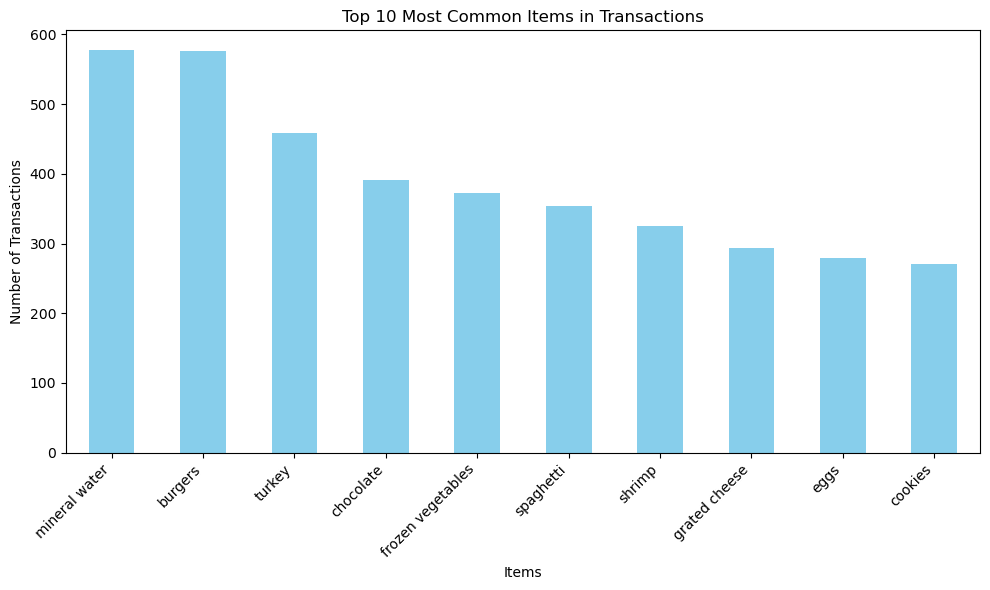

In [10]:
df_split = df.iloc[:, 0].str.split(',')

# Perform one-hot encoding on the split items (each unique item becomes a column)
df_encoded = pd.get_dummies(df_split.apply(pd.Series).stack()).groupby(level=0).sum()

# Sum the occurrences of each item across all transactions
item_counts = df_encoded.sum().sort_values(ascending=False)

# Plot the top 10 most common items in transactions
plt.figure(figsize=(10, 6))
item_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Items in Transactions')
plt.xlabel('Items')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [52]:
# converting the data to appropriate format
trans = []

for i in range(0, 7501):
  trans.append([str(df.values[i,j]) for j in range(0, 20)])

trans 

trans[0] #it gives rows

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

In [53]:
trans[1]

['burgers',
 'meatballs',
 'eggs',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

In [55]:
trans[2]

['chutney',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

In [56]:
len(trans)

7501

In [1]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [36]:
from apyori import apriori

rules = apriori(transactions = trans,min_support = 0.003,
                                    min_confidence = 0.2,
                                    min_lift = 3,
                                    min_length = 2,
                                    max_length = 2)


rules

results = list(rules)
results
len(results) 

9

In [45]:
results[0]

RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])

In [39]:
results[0][0]

frozenset({'chicken', 'light cream'})

In [40]:
results[0][1]# support

0.004532728969470737

In [41]:
results[0][2][0][0] # base item

frozenset({'light cream'})

In [42]:
results[0][2][0][1] # add item

frozenset({'chicken'})

In [43]:
results[0][2][0][2] # confidence

0.29059829059829057

In [44]:
results[0][2][0][3] # lift

4.84395061728395

In [47]:
a = []
b = []
c = []
d = []
e = []

for i in range(0,9):
    a.append(results[i][2][0][0])
    b.append(results[i][2][0][1])
    c.append(results[i][1])
    d.append(results[i][2][0][2])
    e.append(results[i][2][0][3])
    
    
d1 = pd.DataFrame(a)
d2 = pd.DataFrame(b)
d3 = pd.DataFrame(c)
d4 = pd.DataFrame(d)
d5 = pd.DataFrame(e)    

In [48]:
#To combine all df's in a tabular form
df = pd.concat([d1,d2,d3,d4,d5],axis=1) 
df 

,0,0,0,0,0
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
6,light cream,olive oil,0.003200,0.205128,3.114710
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
8,pasta,shrimp,0.005066,0.322034,4.506672


In [ ]:
# Insights:

#There is a strong association between certain products, suggesting complementary purchases.
#Customers who buy specific items tend to have a higher likelihood of purchasing related items.
#These insights can be used to develop targeted recommendations and promotions for customers.

In [ ]:
# INTERVIEW QUESTIONS:

# 1. What is Lift and Why is it important in Association Rules?

# The lift value is a measure of importance of a rule.
# By using rule filters, you can define the desired lift range in the settings.

# Importance:
# The lift value is an important measure in association rule mining because it provides a way to distinguish between significant and insignificant association rules.
# A high lift value indicates that the association rule is more significant, as it suggests that the two items are highly dependent on each other. 

In [ ]:
# 2. What is Support and Confidence. How do you calculate them?

# Support:
# - Definition: Support measures how frequently a particular itemset (or rule) appears in the dataset.
# - Importance: It indicates how prevalent an itemset is in the dataset. High support means the itemset is frequent and appears in many transactions, making it a candidate for a strong rule.
# - Calculation: The support of an itemset is the number of transactions in which the itemset appears, divided by the total number of transactions. 

# Confidence:
# - Definition: Confidence is a measure of the likelihood that an itemset will appear if another itemset appears.
# - Importance: confidence is a measure of the reliability or support for a given association rule.
# - Calculation: The likelihood that a product Y will be sold with product X. Confidence is calculated by dividing the support by the antecedent support.

In [ ]:
# 3. What are some limitations or challenges of Association rules mining?

# 1. Overfitting:
# - Challenge: Generating too many rules can lead to overfitting, where the rules may describe noise or specific details in the training data that do not generalize well to new data.

# 2. Interpretability:
# - Challenge: With a large number of rules, it can be difficult to interpret and select the most relevant or actionable rules. The process of filtering out significant rules from a vast number of generated rules can be complex.

# 3. Imbalanced Data:
# - Challenge: If the dataset is imbalanced, where certain items are much more frequent than others, it can skew the results. Rare itemsets might not be discovered effectively, and frequent itemsets might dominate the results.

# 4. Data Sparsity:
# - Challenge: In datasets with a high degree of sparsity (many items appear in only a few transactions), it can be difficult to find meaningful associations. This sparsity can make it harder to identify significant rules.